In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the .mat file
'''
 data_path = f"E:\data/dataClean-ICA3-{num}-T1.mat"
 num = 25,...,35
'''
data = loadmat('E:\data/dataClean-ICA3-25-T1.mat')

In [2]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Dec  1 21:08:57 2020',
 '__version__': '1.0',
 '__globals__': [],
 'dataAvgSorted': array([[[-3.67843048e-01, -3.69676859e-01, -3.15346088e-01, ...,
          -2.23677031e-01, -1.49912273e-01, -2.63916141e-01],
         [-3.14872974e-01, -2.87633290e-01, -3.60475938e-01, ...,
          -2.29961451e-01, -1.06754000e-02, -3.55501914e-01],
         [-2.42970274e-01, -2.45680229e-01, -3.54625435e-01, ...,
          -1.56247578e-01,  4.49661609e-03, -3.19593304e-01],
         ...,
         [ 2.24728882e-01,  1.56514927e-01,  3.16874334e-01, ...,
           1.21501656e-01,  4.72064611e-02,  2.65511587e-01],
         [ 2.58862944e-01,  1.18106290e-01,  2.71020273e-01, ...,
           2.04971355e-01,  5.09785508e-02,  2.55848991e-01],
         [ 2.53062380e-01,  1.31658360e-01,  2.65389181e-01, ...,
           1.53113936e-01,  8.76049303e-02,  1.09284081e-01]],
 
        [[-4.46726327e-02, -1.43124722e-01, -4.83121033e-03

In [3]:
def plot_(array, channel, trial, block):
    y = array[channel, :, trial, block]
    x = range(len(y))
    plt.figure(figsize=(14, 4)) 
    plt.plot(x,y, label=f"Channel: {channel}; Trial: {trial}; Block : {block}")

    plt.xlabel('t')
    plt.ylabel('Acc')
    plt.title('Time Series Plot')
    
    # Adding grid
    plt.grid(True)
    plt.legend()
    return 

def summary(array):
    shape = array.shape
    C = shape[0] #Channels (signal), 
    T = shape[1] #time,
    Trials = shape[2] # trial,
    B = shape[3] #trialblock
    print(f"Channels: {C}, Trials: {Trials}, TrialBlocks: {B}")
    empty = np.zeros((B))
    dict = {}
    for b in range(B):
        channels = []
        for c in range(C):
            if np.all(np.isnan(array[c,:,0,b])):
               channels.append(c)
               empty[b] = len(channels)
               dict.update({f"{b}": channels})
    #print(f"Total empty channels: {np.sum(empty)*}")
    #print(f"Average empty channels: {np.sum(empty)/(b*t)}")
    print(f"Number of active channels for each trial block: {60-empty}")
    return dict

There are two type of trials based on missing channels:

In [7]:
data1 = loadmat('E:\data/dataClean-ICA3-26-T1.mat')
summary(data1['dataSorted'])

Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [56. 53. 53. 53.  0. 56. 56. 53. 56.  0. 53. 53.]


{'0': [14, 23, 48, 55],
 '1': [2, 11, 30, 31, 40, 49, 51],
 '2': [2, 11, 30, 31, 40, 49, 51],
 '3': [2, 11, 30, 31, 40, 49, 51],
 '4': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 '5': [14, 23, 48, 55],
 '6': [14, 23, 48, 55],
 '7': [2, 11, 30, 31, 40, 49, 51],
 '8': [14, 23, 48, 55],
 '9': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 '10': [2, 11, 30, 31, 40, 49, 51],
 '11': [2, 11, 3

In [4]:
summary(data['dataSorted'])

Channels: 60, Trials: 108, TrialBlocks: 12
Number of active channels for each trial block: [48. 52. 48. 48. 52. 52. 48. 52. 48. 52. 48. 52.]


{'0': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '1': [8, 10, 12, 20, 21, 28, 29, 55],
 '2': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '3': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '4': [8, 10, 12, 20, 21, 28, 29, 55],
 '5': [8, 10, 12, 20, 21, 28, 29, 55],
 '6': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '7': [8, 10, 12, 20, 21, 28, 29, 55],
 '8': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '9': [8, 10, 12, 20, 21, 28, 29, 55],
 '10': [7, 9, 10, 12, 13, 15, 17, 19, 25, 26, 34, 45],
 '11': [8, 10, 12, 20, 21, 28, 29, 55]}

In [51]:
data['listD']

array([[ 1,  2,  3,  4,  5,  6,  7, 12, 15, 17, 19, 23, 24, 25, 28, 31,
        32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 57, 58, 59, 60]], dtype=uint8)

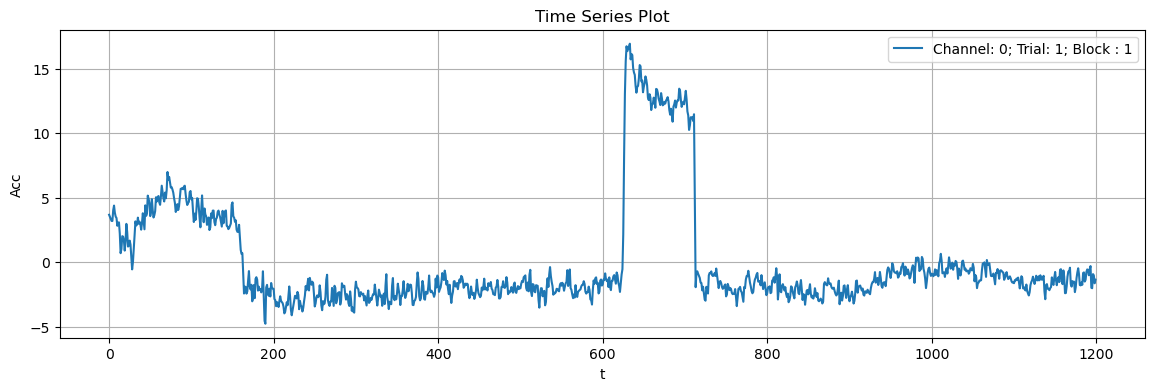

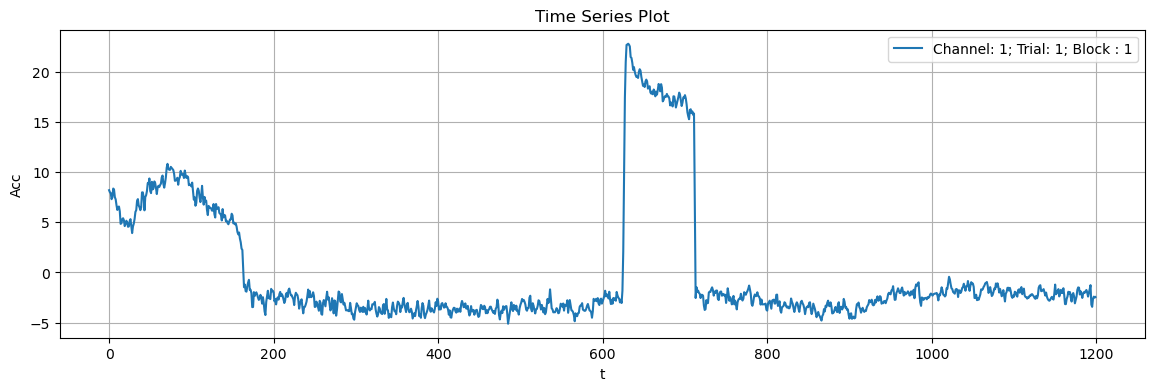

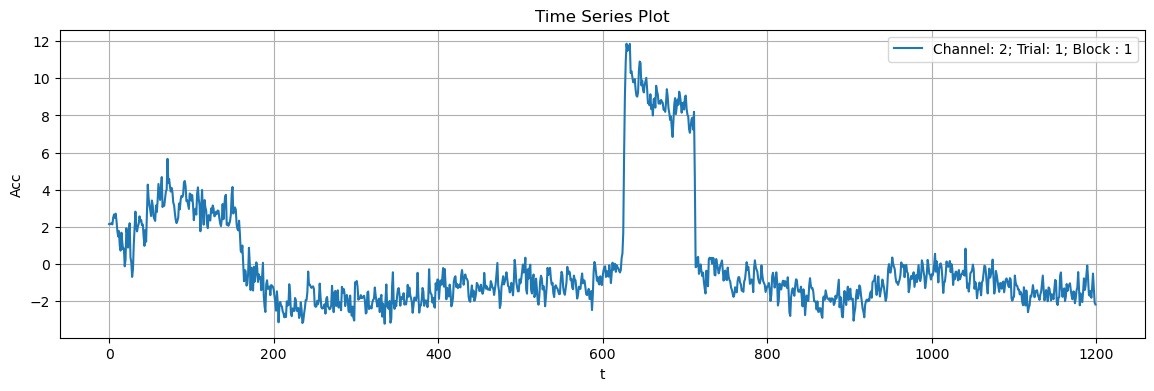

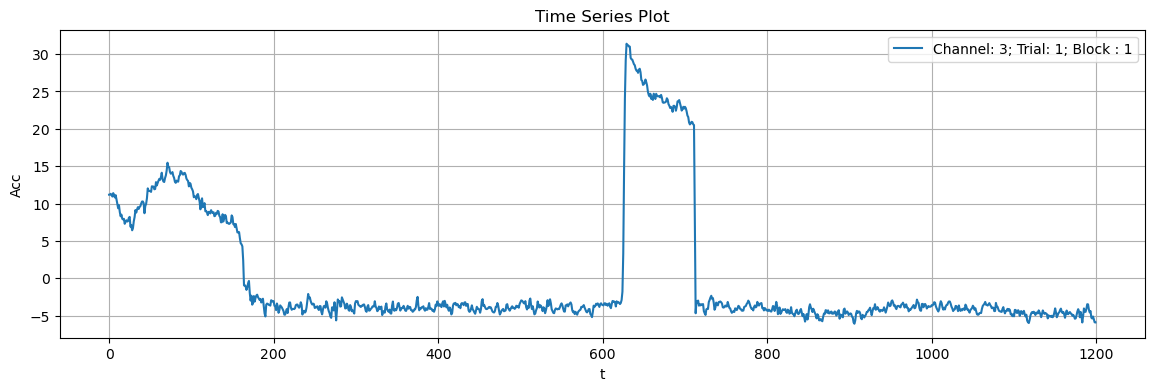

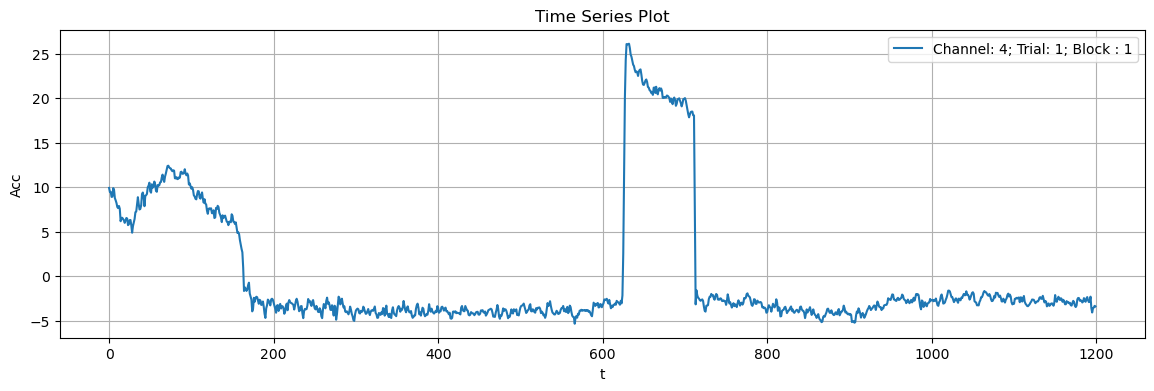

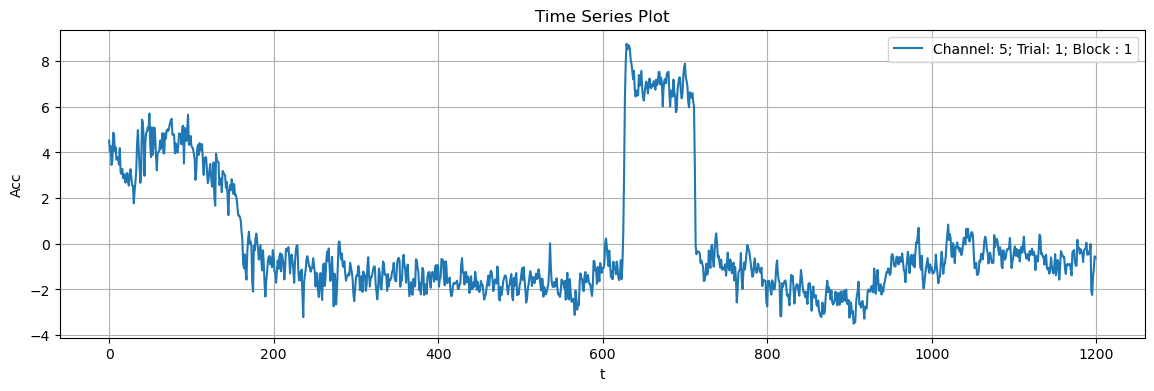

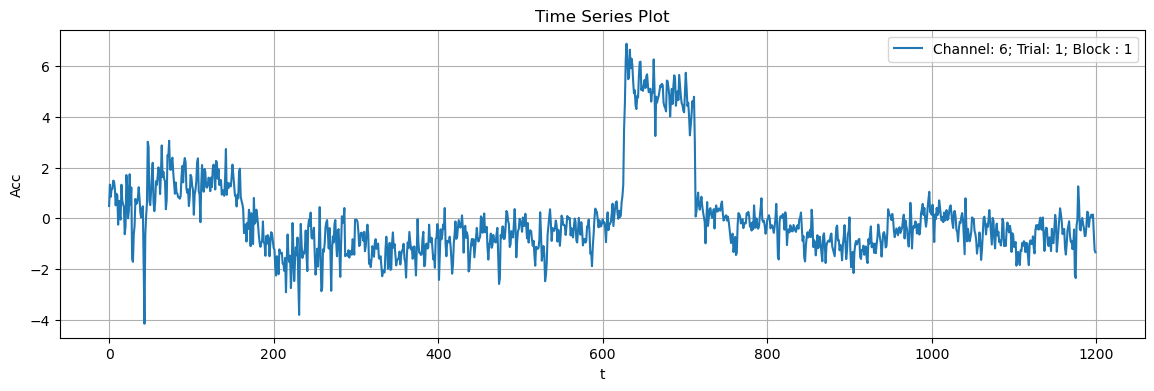

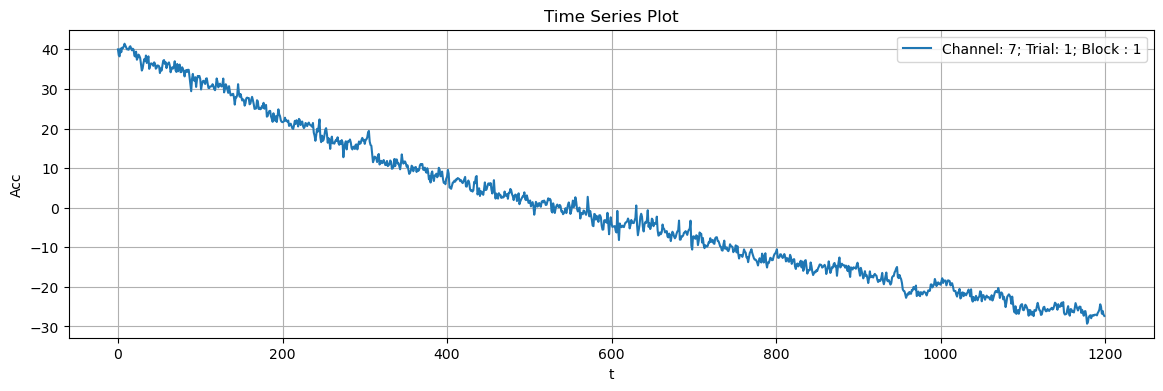

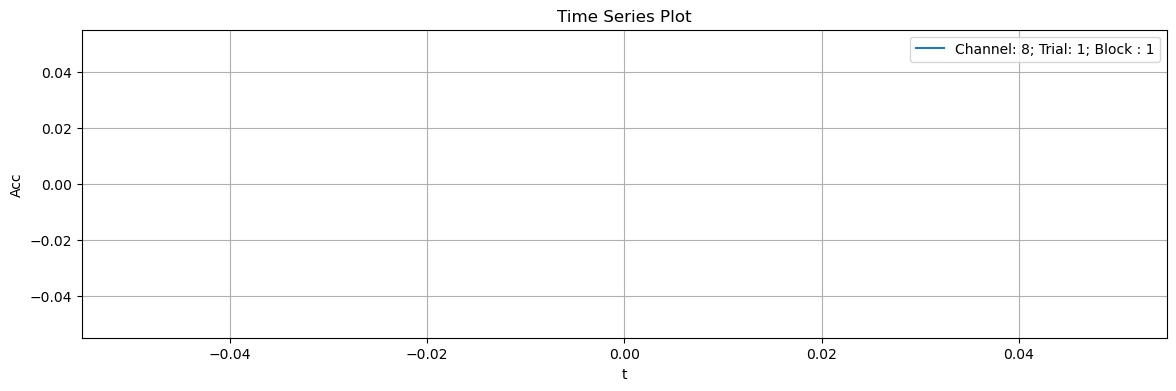

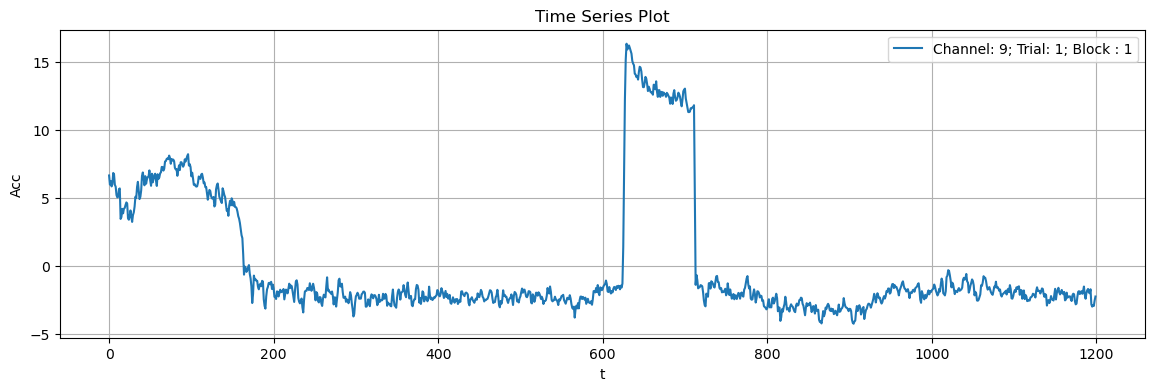

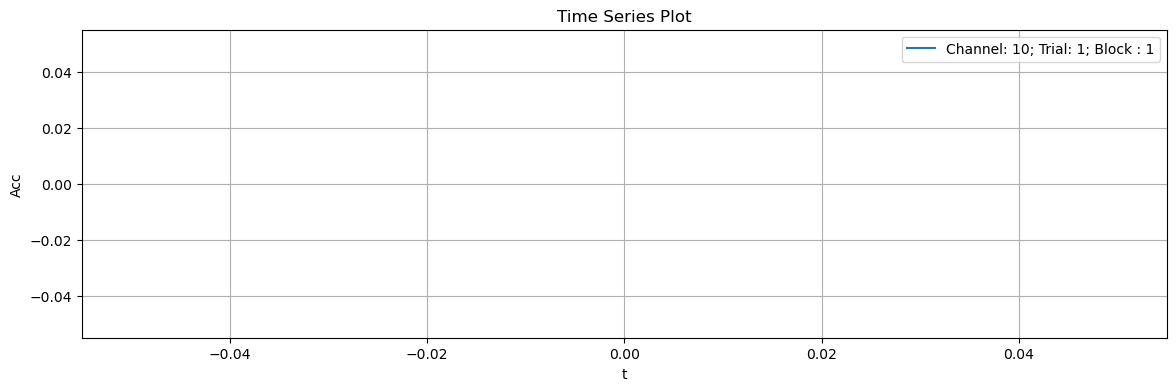

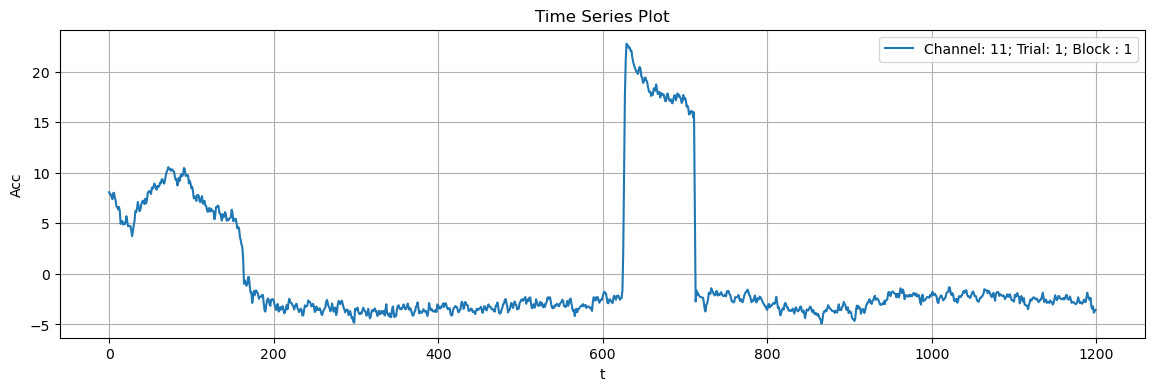

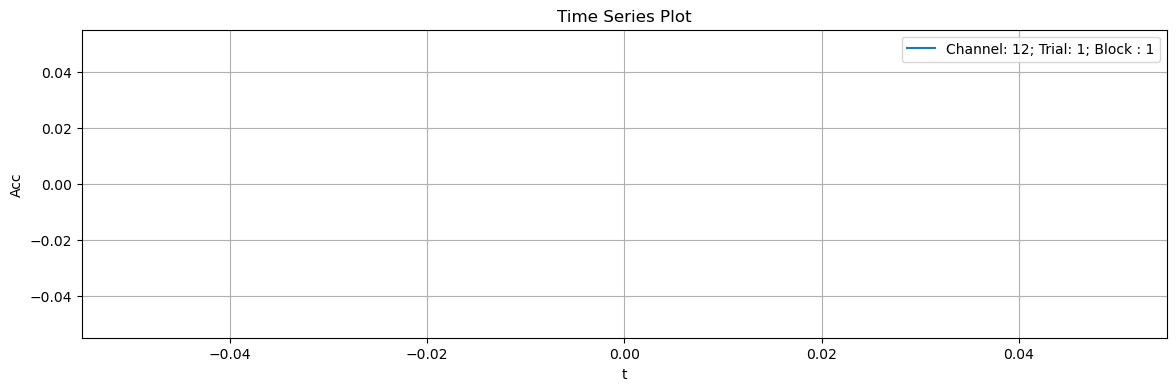

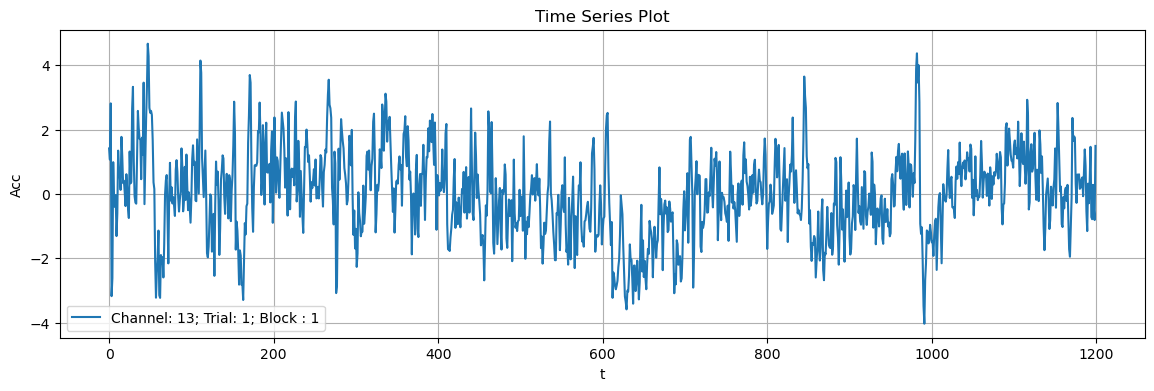

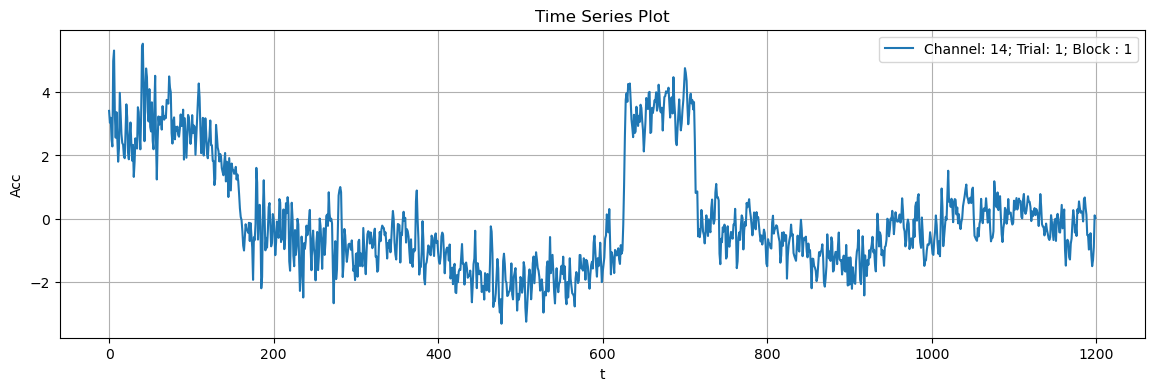

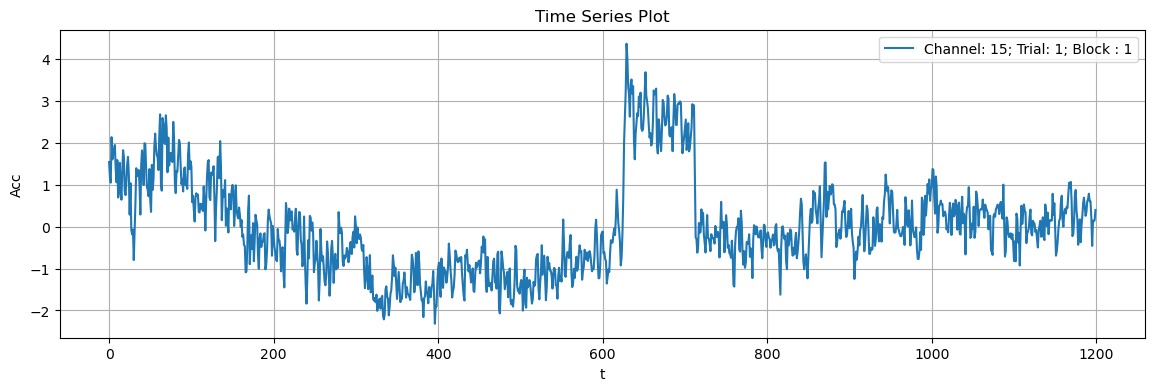

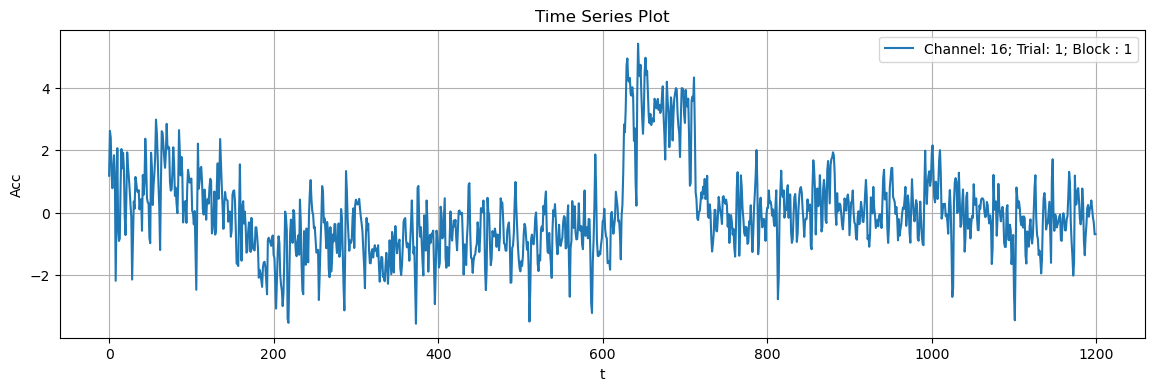

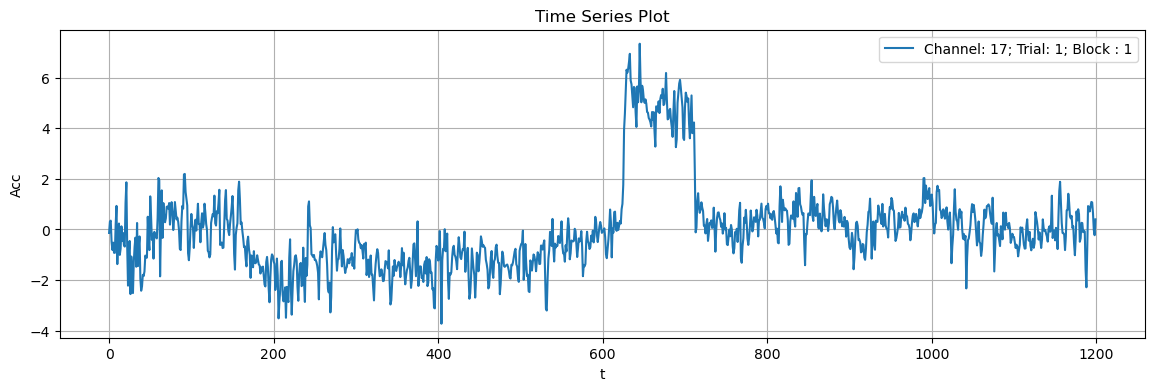

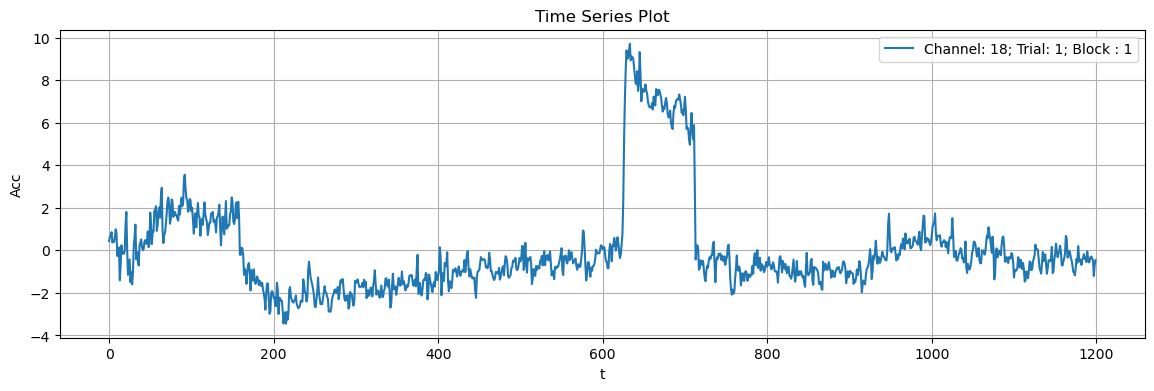

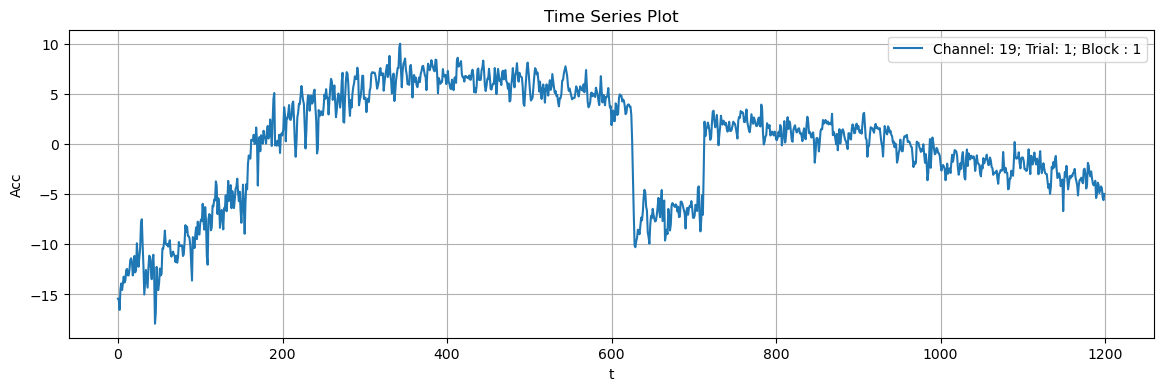

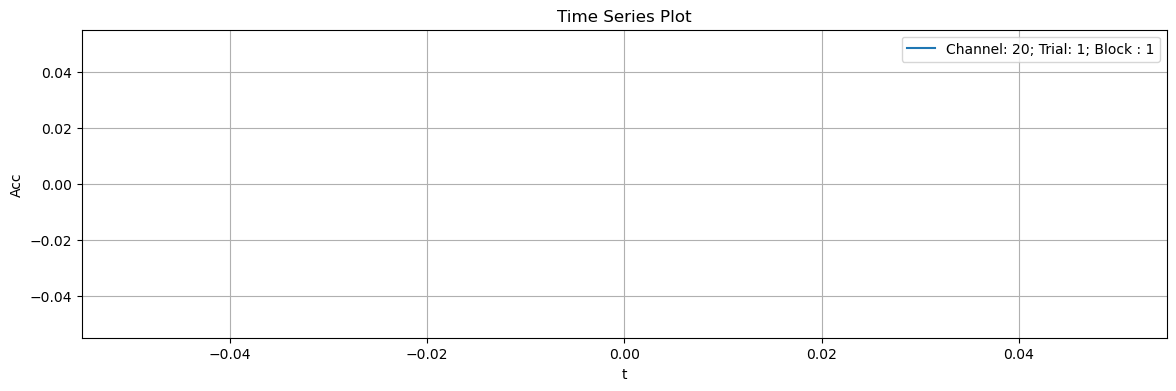

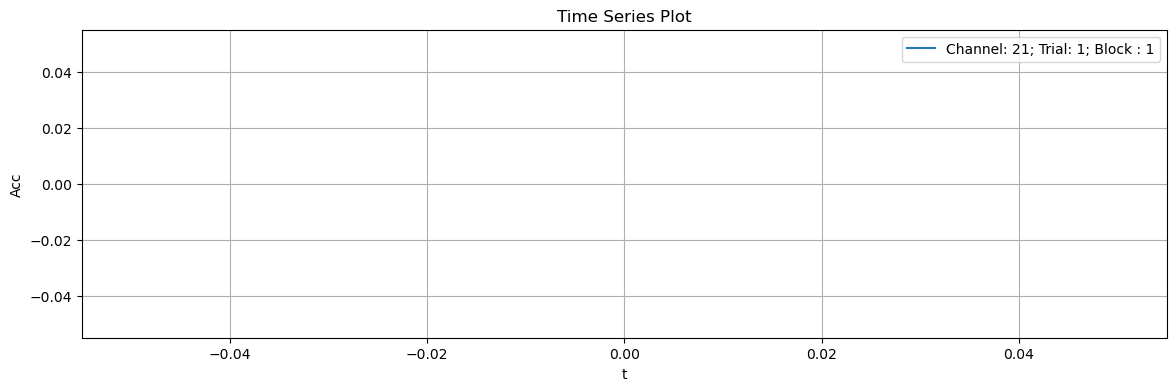

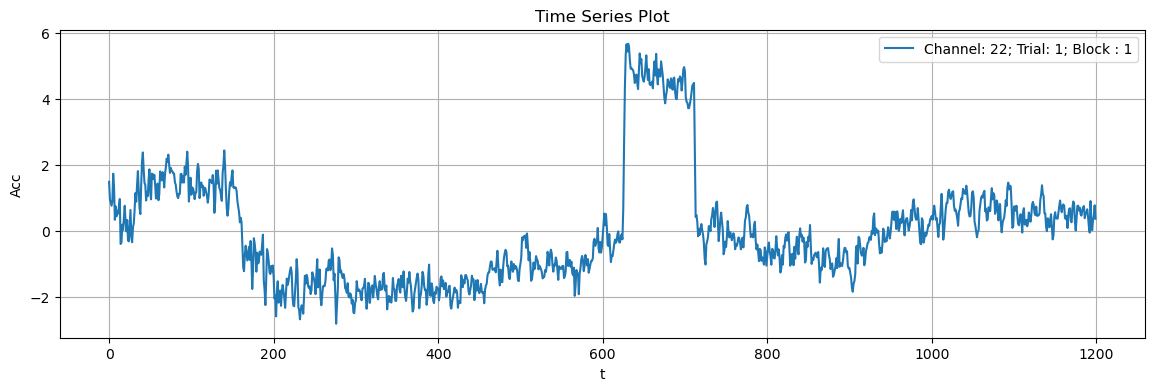

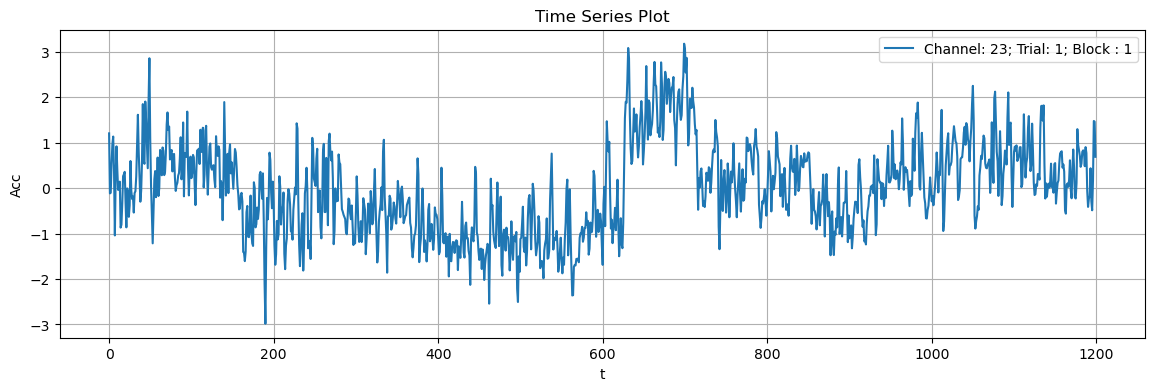

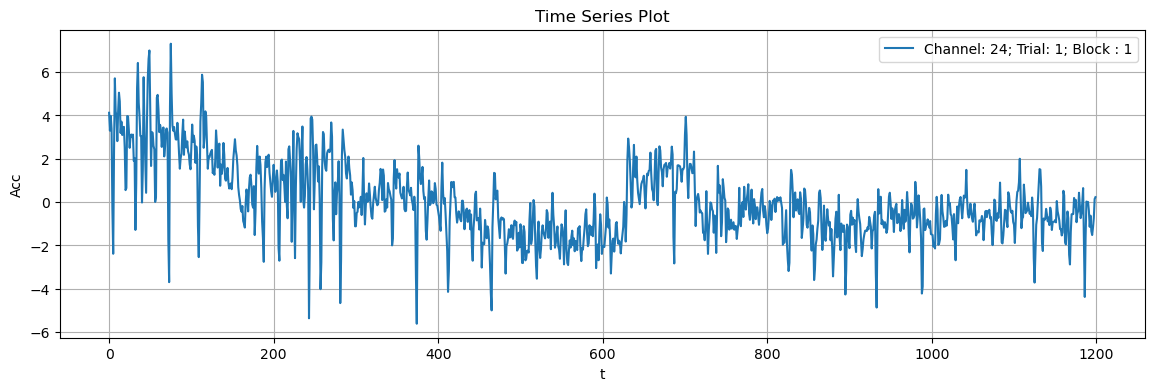

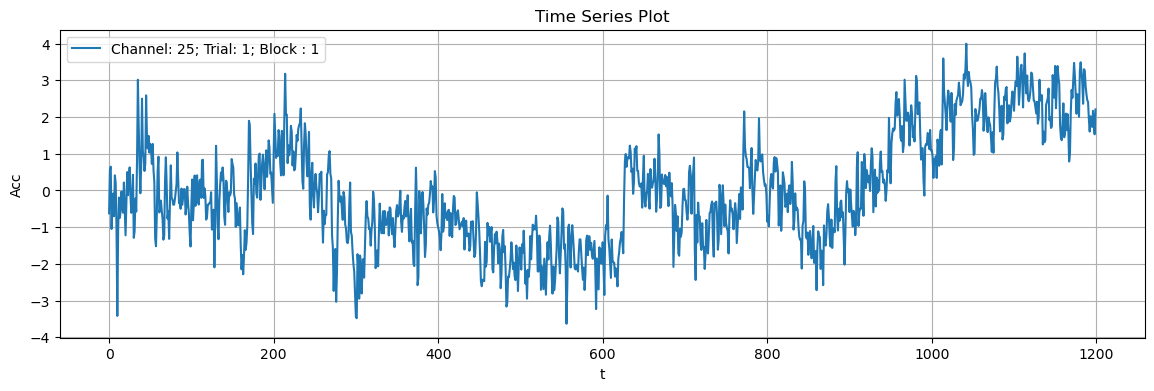

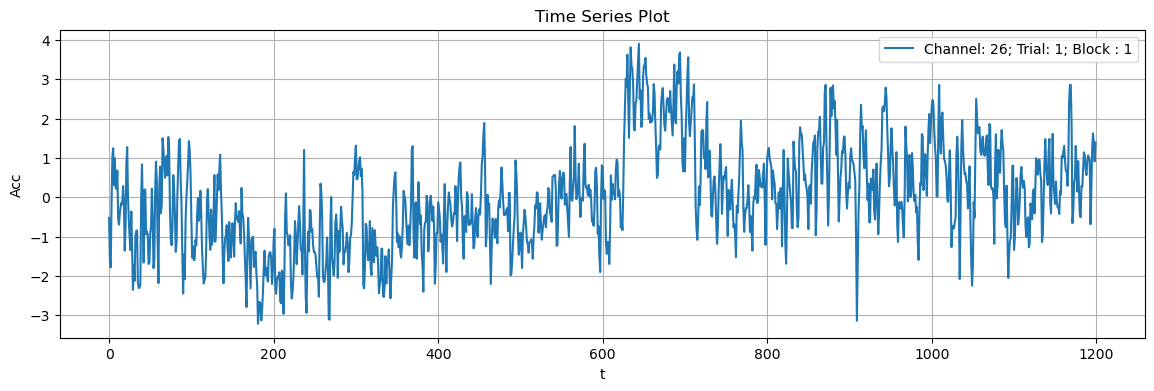

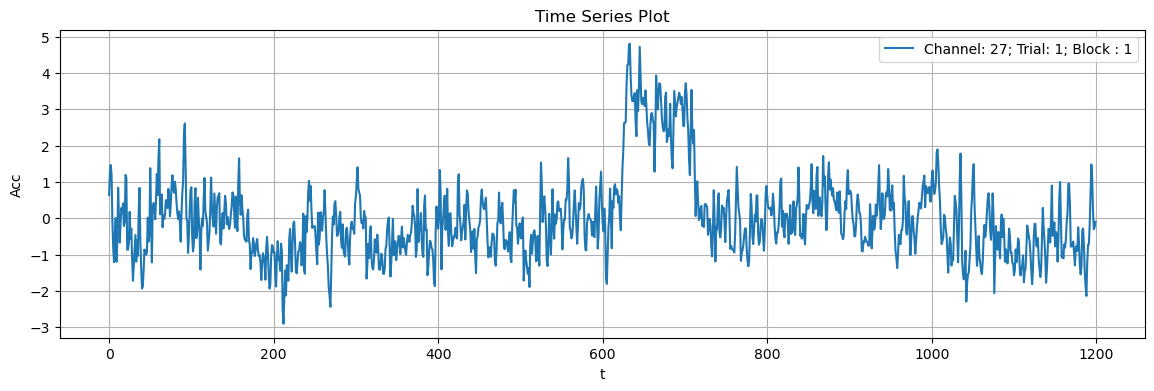

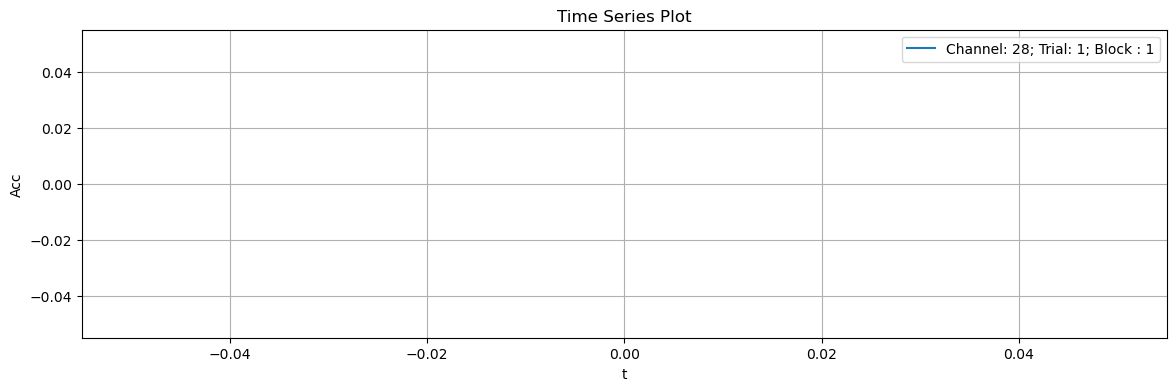

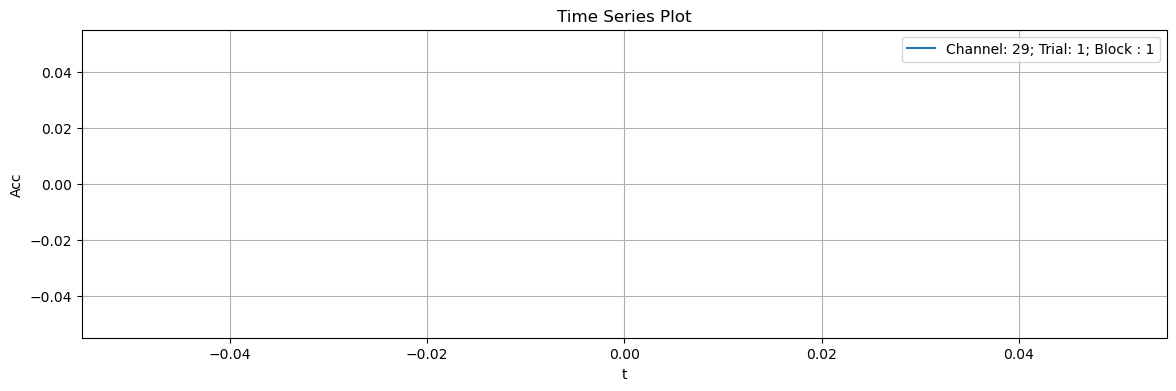

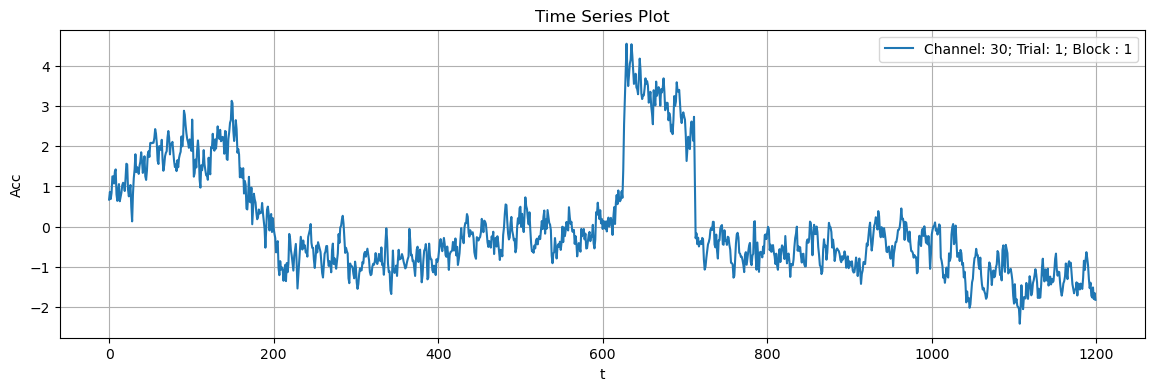

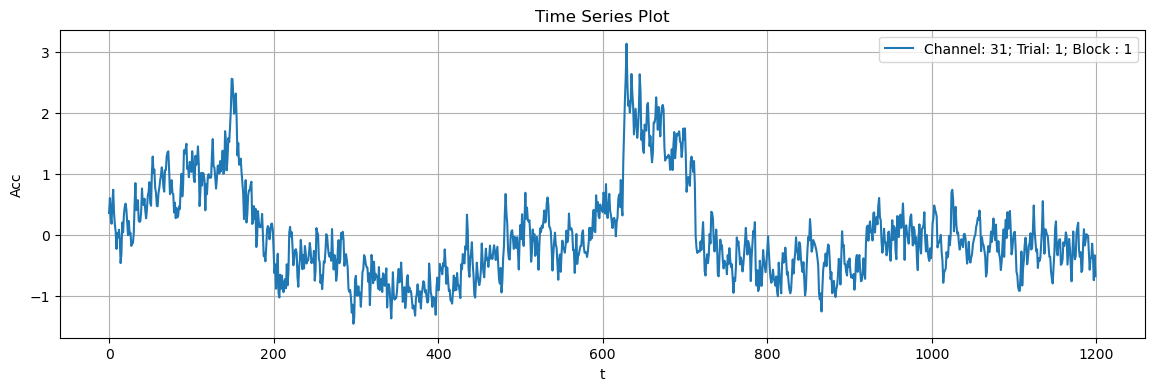

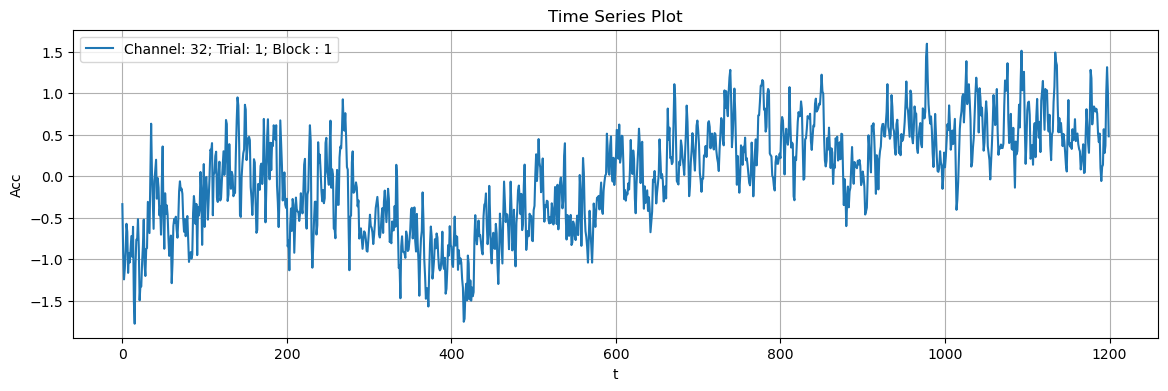

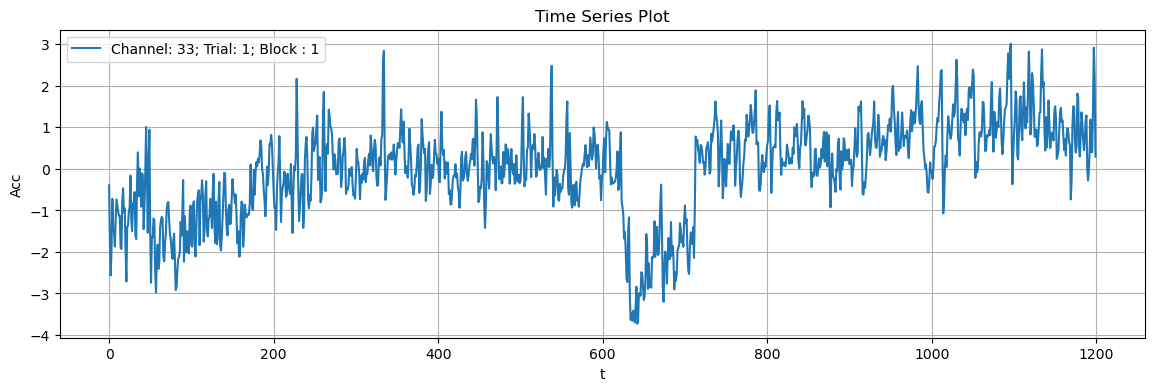

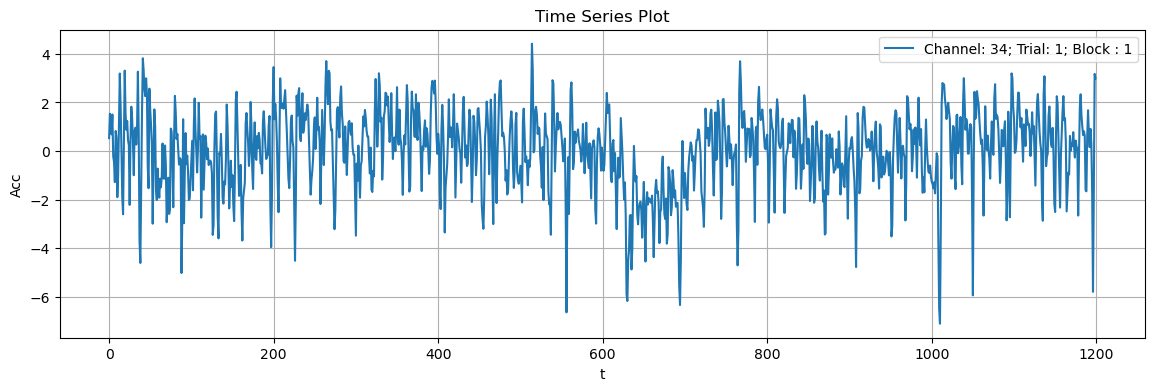

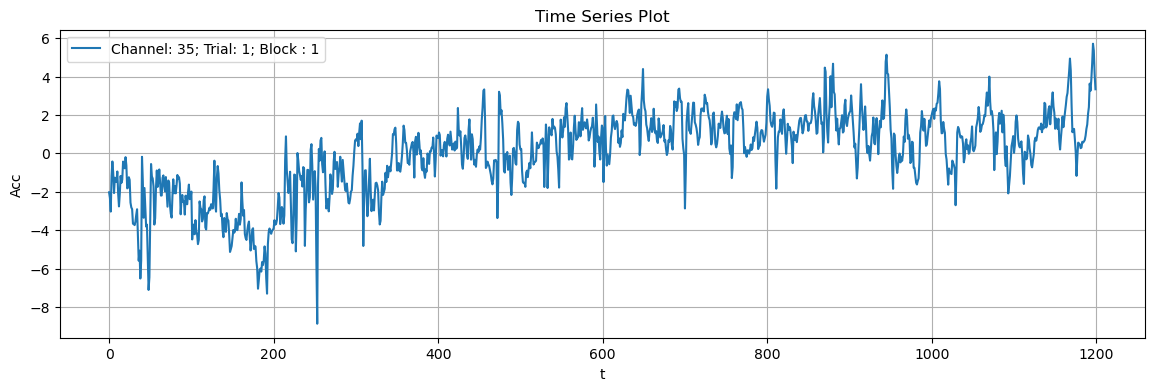

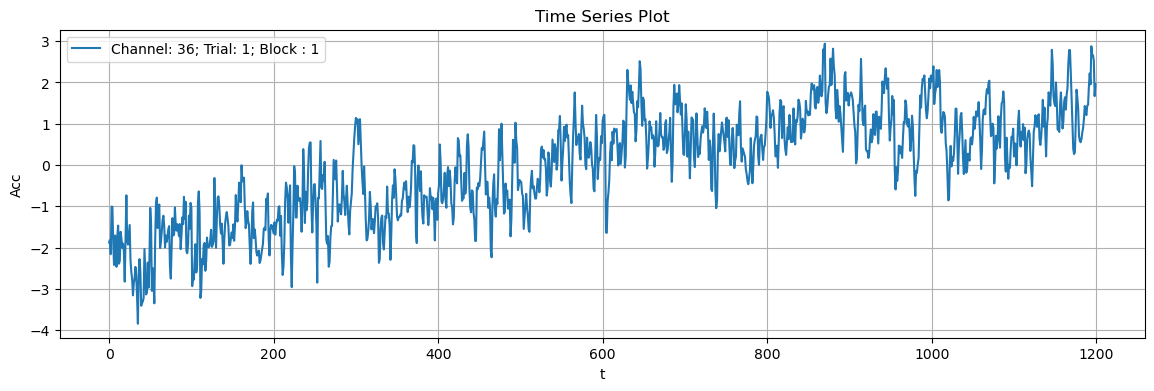

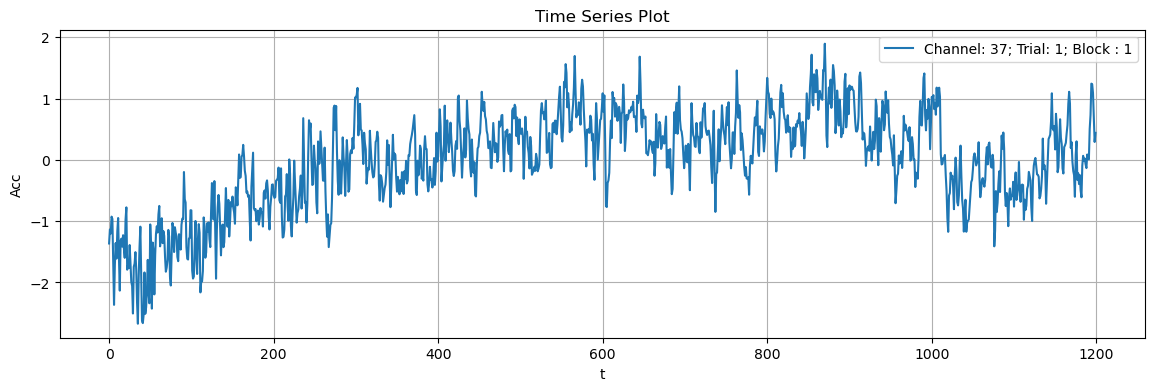

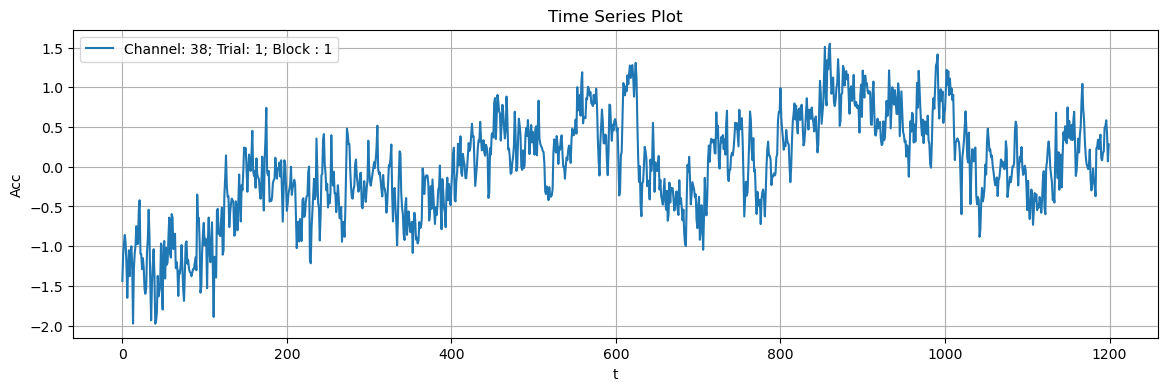

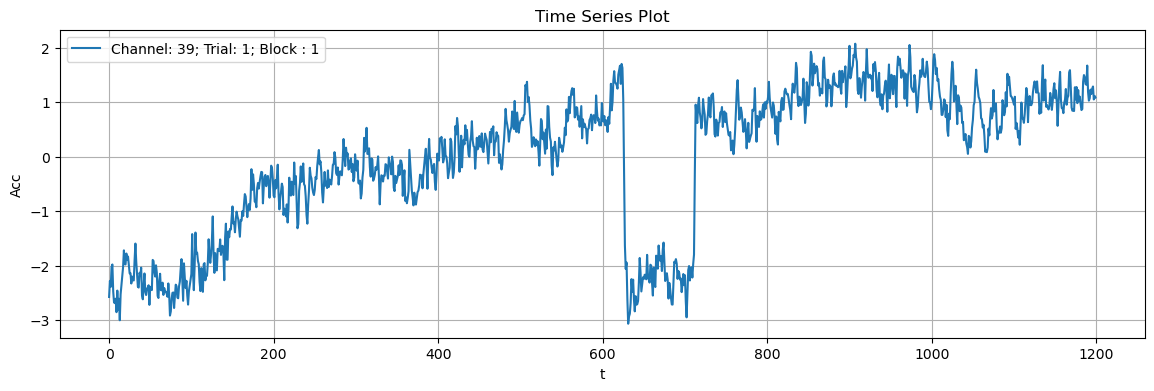

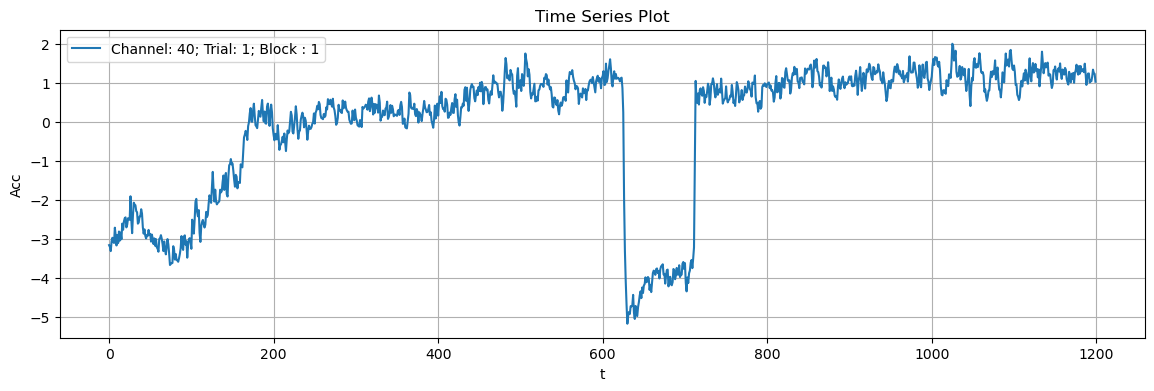

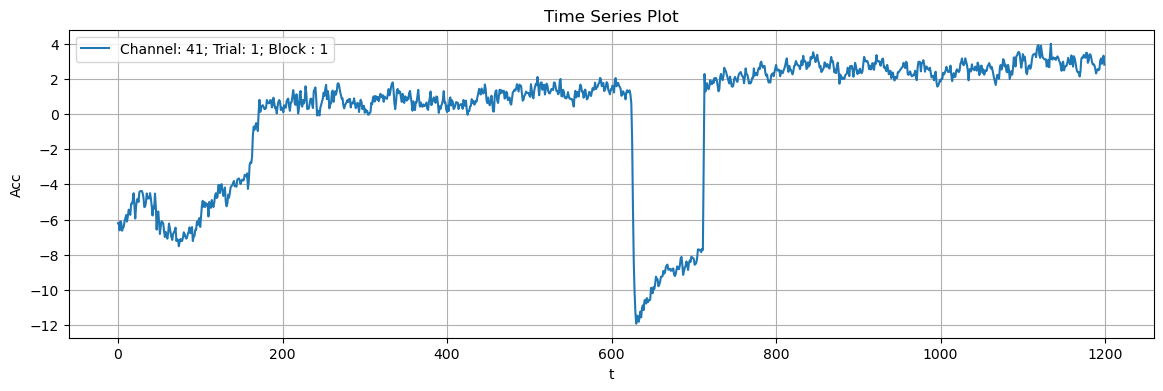

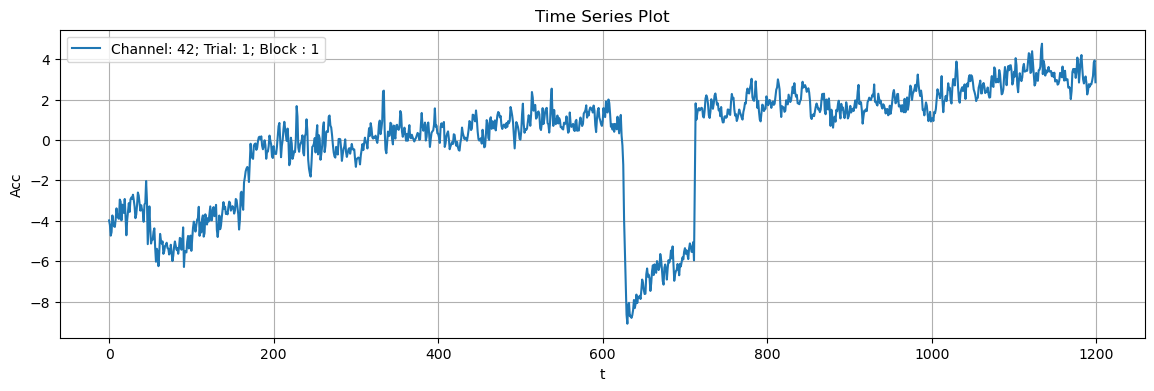

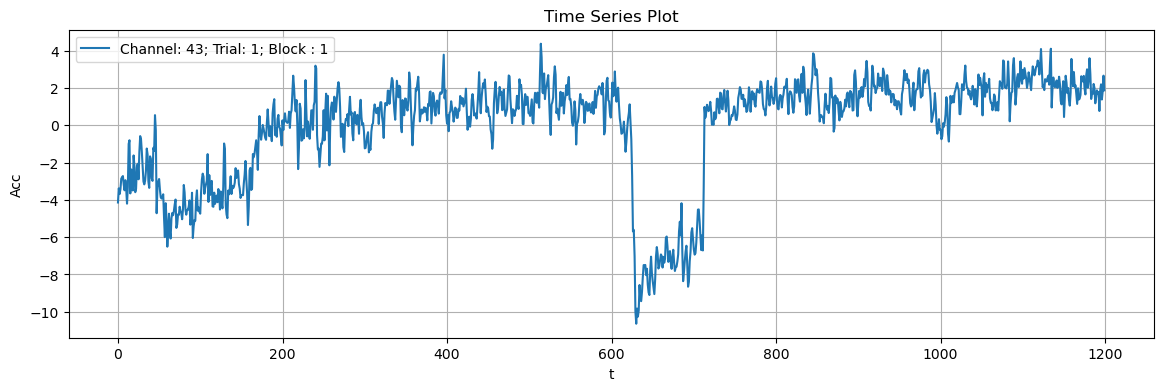

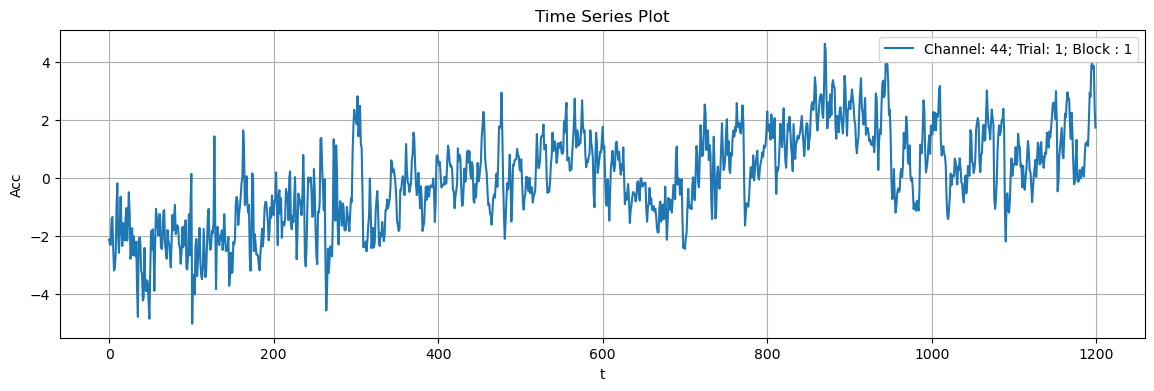

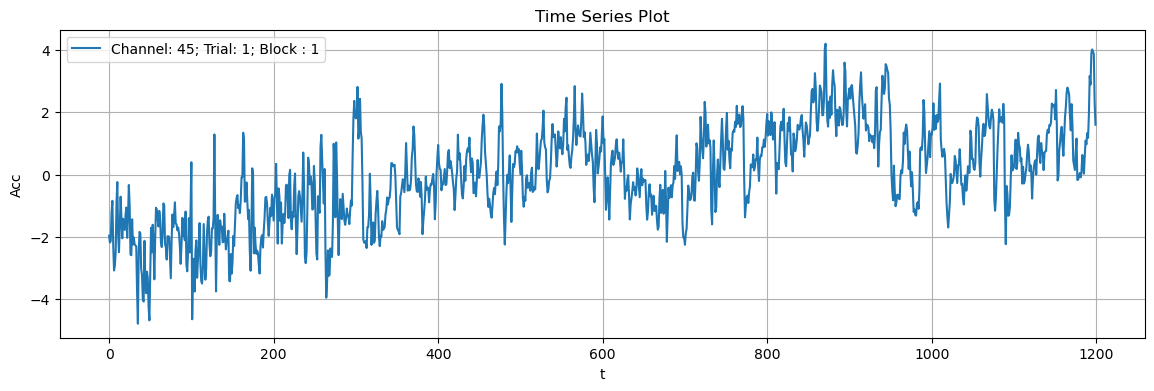

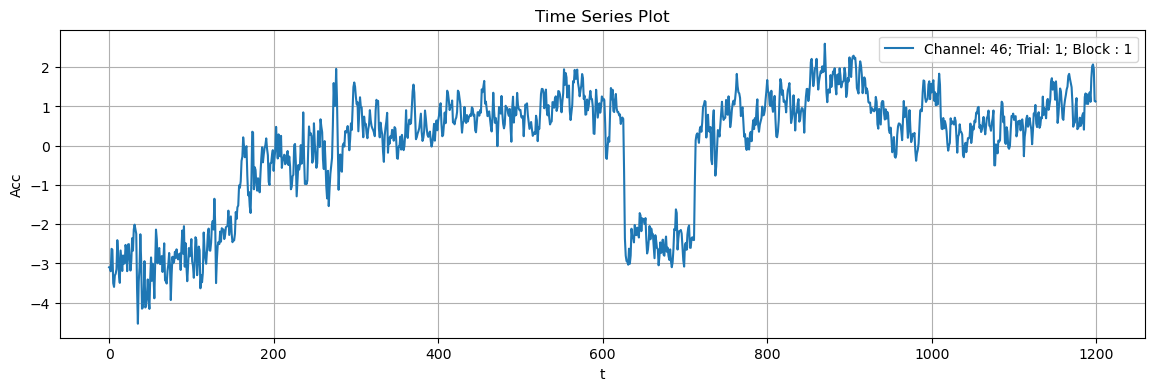

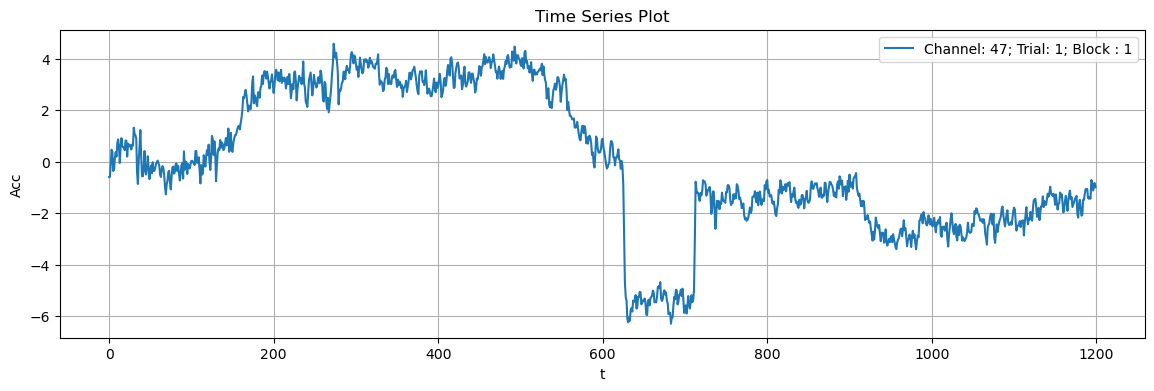

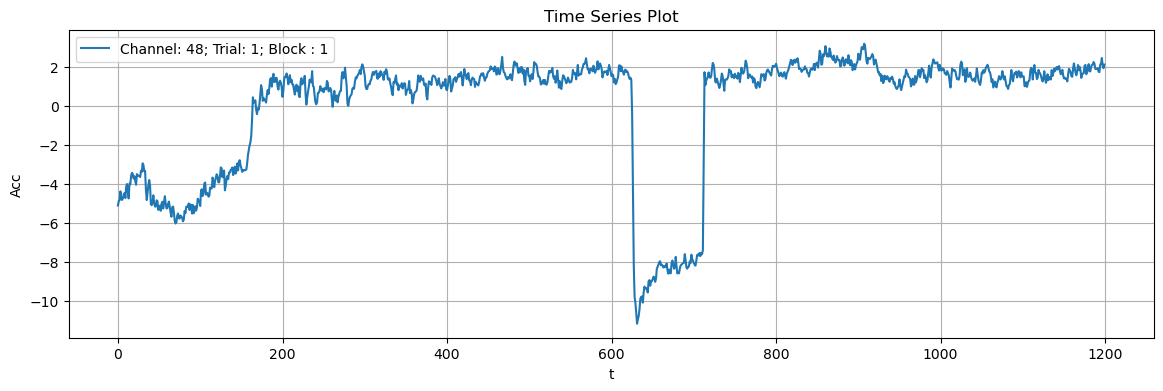

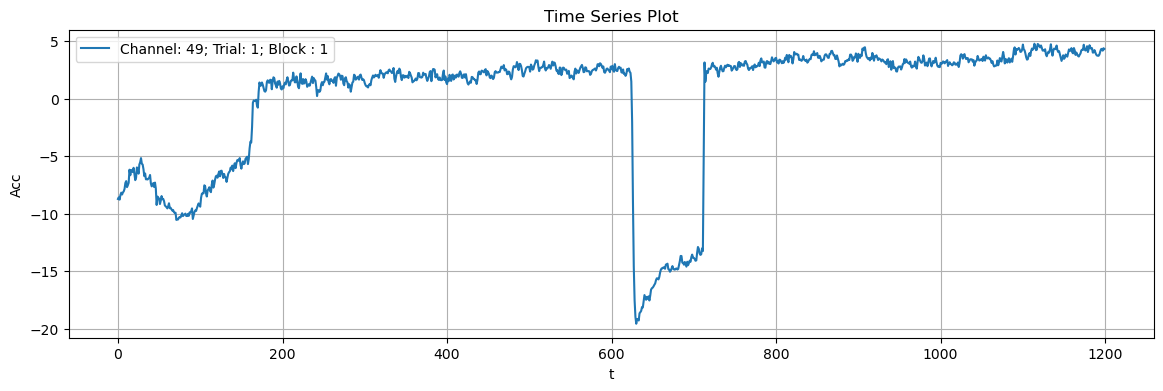

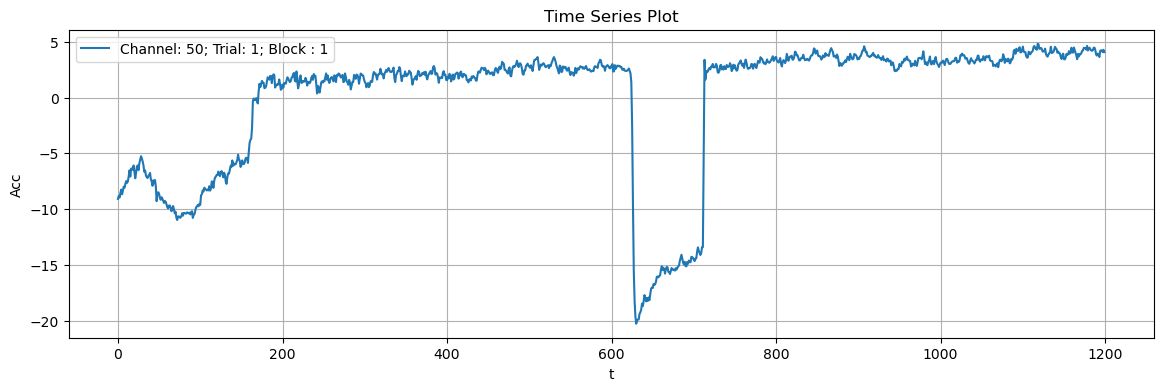

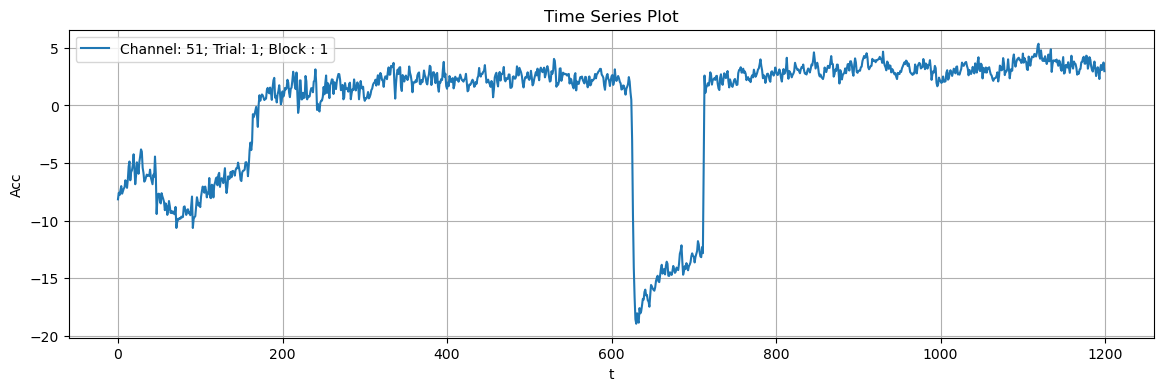

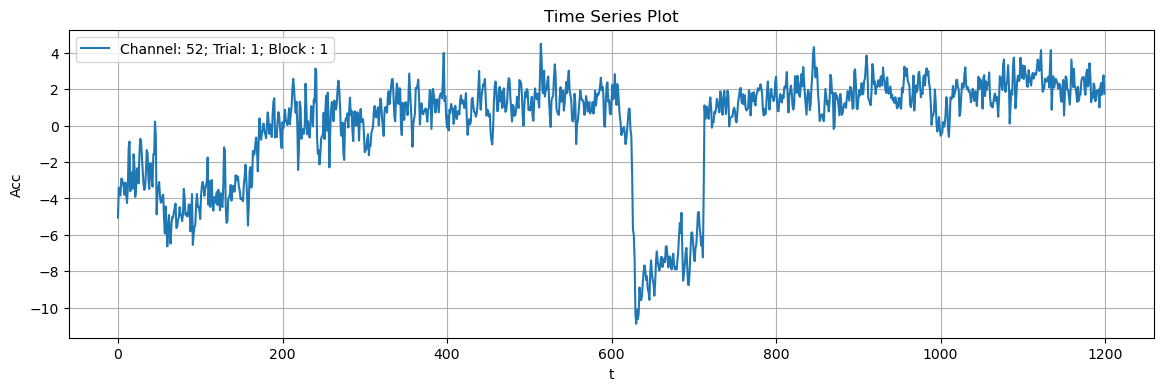

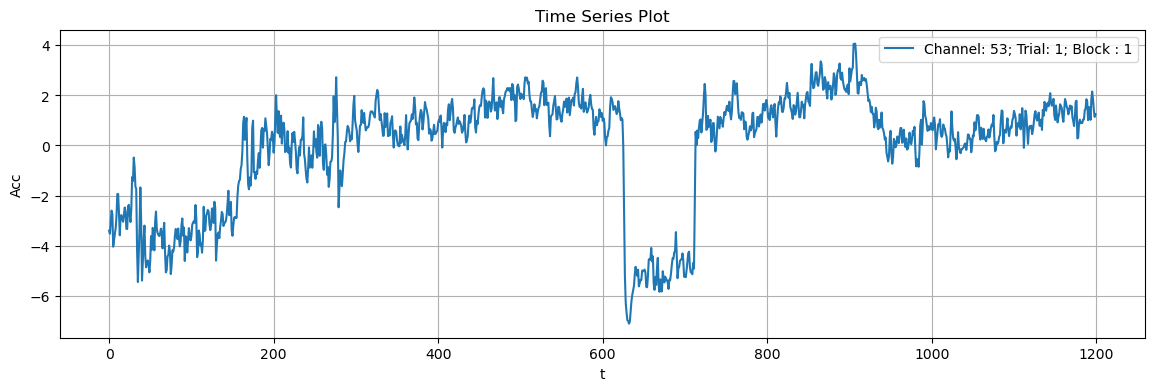

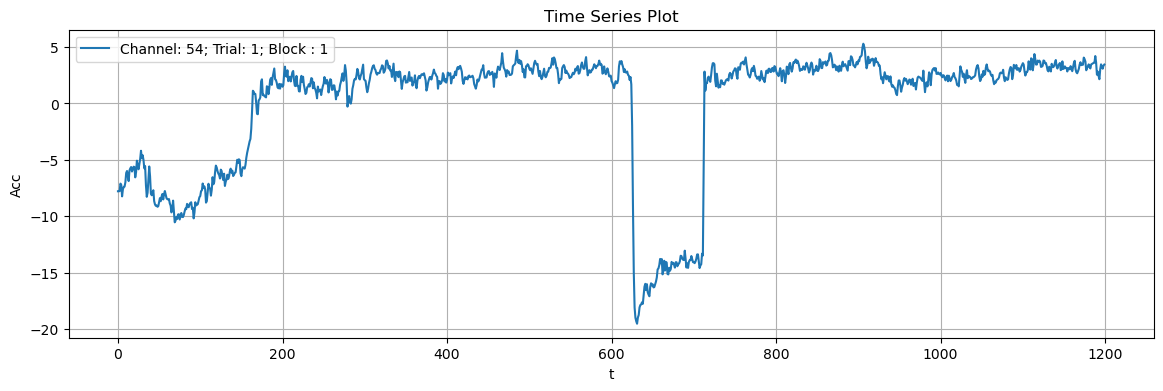

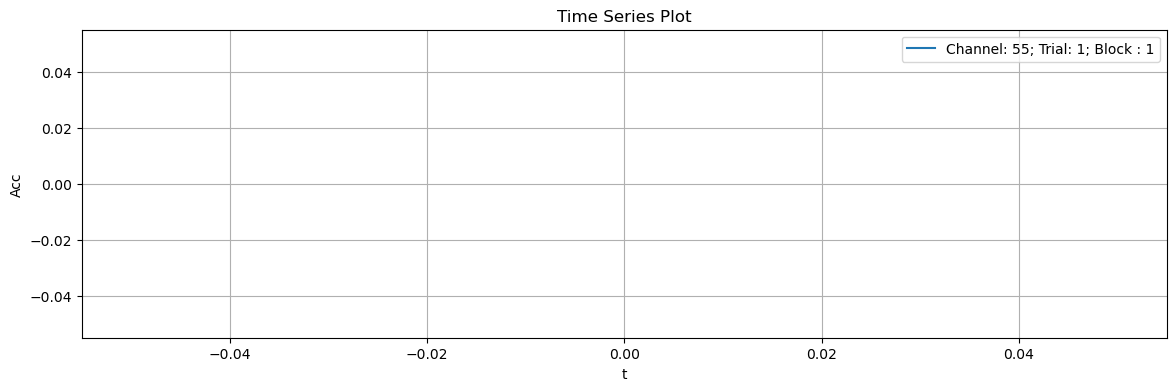

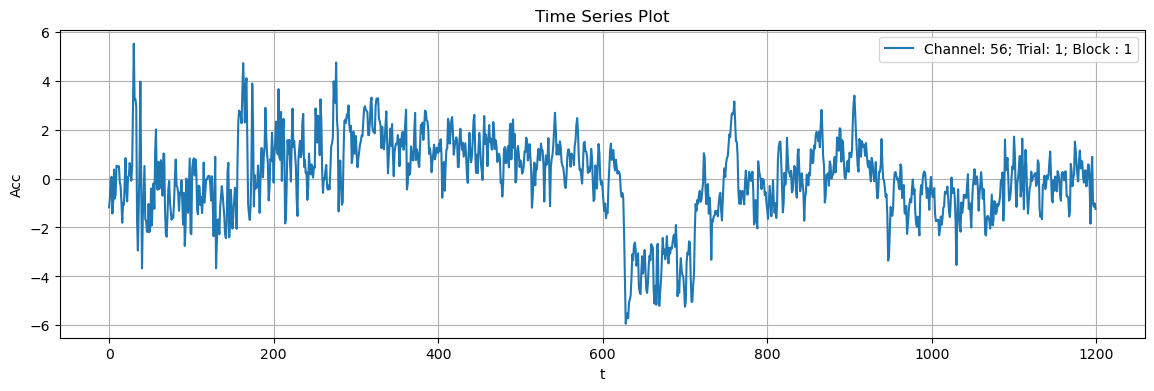

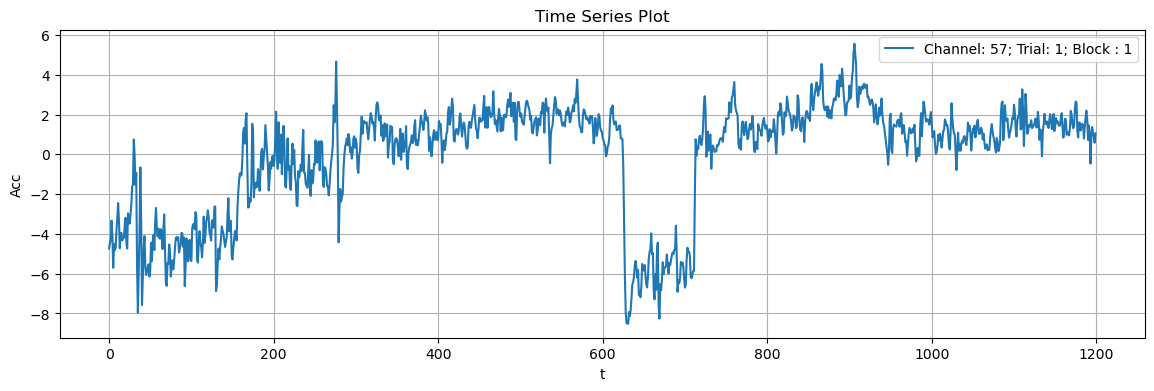

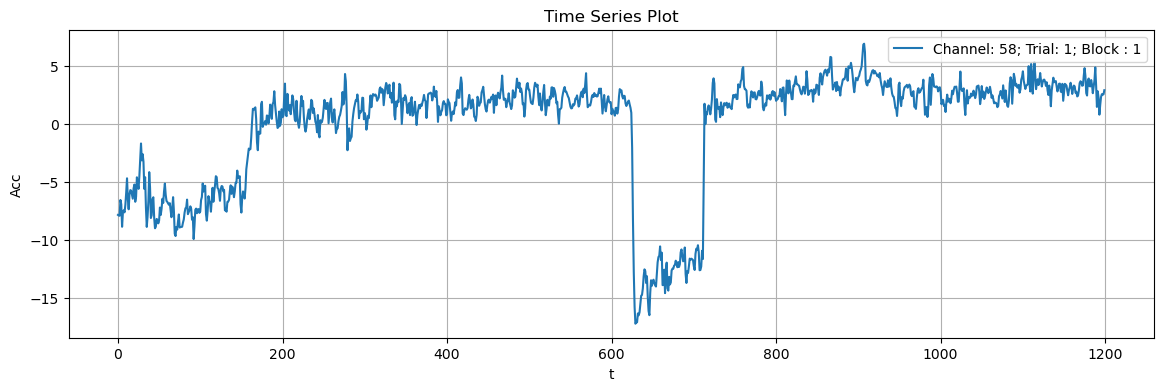

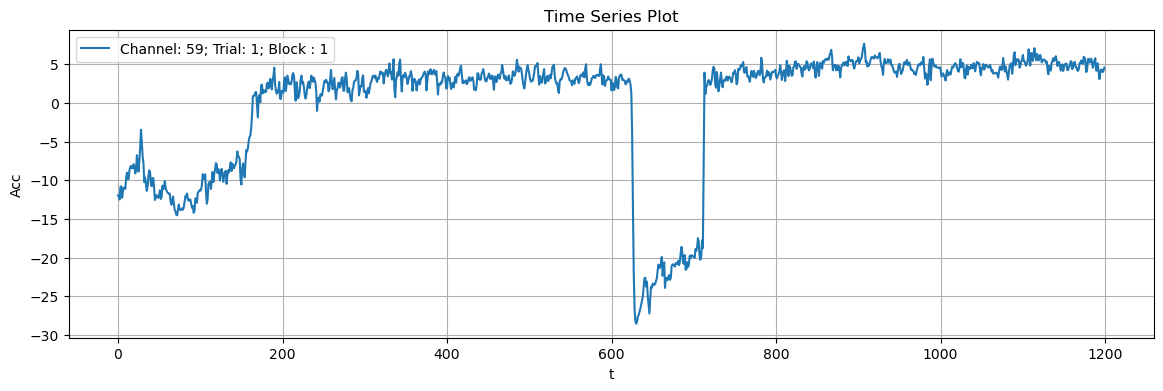

In [24]:
for c in range(60):
    plot_(data['dataSorted'], c,1,1)
    plt.show()

Columns: ['__header__', '__version__', '__globals__', 'dataAvgSorted', 'dataSorted',
          'dataSortedDS', 'ic_data2', 'ic_data3', 'indexM', 'listD', 'listM']

Channels (signal), time, trial, trialblock


ica source space

Motivacion: 

In [3]:
data['ic_data3'].shape

(42, 1200, 108, 12)

In [9]:
data['dataSorted'].shape

(60, 1200, 108, 12)

In [11]:
data['dataSortedDS'].shape

(60, 240, 108, 12)

In [6]:
labels = [0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2]
labels = np.repeat(labels, 108) #(108/12=9) is both periodical within samples and trialblocks  
labels.shape

(1296,)